In [9]:
import os
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [10]:
wt_api_base = 'http://meshintelapi.herokuapp.com/'

In [11]:
wt_orgs = 'organizations'
wt_gris = 'gris'

In [12]:
cwd = os.getcwd()
print(cwd)

/Users/yuvraj.sidhu/Documents/code/wbdata


In [13]:
org_data = requests.get(wt_api_base + wt_orgs).json()
gri_data = requests.get(wt_api_base + wt_gris).json()

In [35]:
print(org_data[19])

{'aggregateIndustry': {'aggregateIndustry1': 'Energy'}, 'cityName': 'New York', 'countryName': 'United States', 'dateEstablished': 1920, 'exportsUpstreamness': 1.65, 'gapUpstreamness': -0.21, 'gris': {'reports': [{'baseYear': '2015', 'indicators': [{'averageValueByIndustry': 34075333333.33, 'averageValueByOverall': 39681630116.11, 'baseYearValue': '6636000000', 'indicatorId': 1, 'maxValueByIndustry': 110215000000, 'maxValueByOverall': 485900000000, 'maxValueCompanyNameByIndustry': 'Chevron CORP', 'maxValueCompanyNameByOverall': 'Wal-Mart Stores Inc.', 'minValueByIndustry': 4762000000, 'minValueByOverall': 146091224, 'minValueCompanyNameByIndustry': 'Hess CORP', 'minValueCompanyNameByOverall': 'Puma SE', 'percentChange': '-28.24', 'rankByIndustry': '6 of 6', 'rankByOverall': '85 of 93', 'value': '4762000000'}, {'averageValueByOverall': 2376041238.5, 'indicatorId': 2, 'maxValueByOverall': 11294380000, 'maxValueCompanyNameByOverall': 'Vodafone Group Public Limited Company', 'minValueByOve

In [15]:
print(gri_data[:1])

[{'aspectScale': 'US$', 'associatedSDGTargets': ['8.1', '9.1', '9.4', '9.5'], 'g4AspectCode': 'G4-EC1', 'g4AspectSubIndicatorDescription': 'Direct economic value generated and distributed', 'g4AspectTitle': 'Economic Impact', 'g4ToStandardsDisclosureMapping': '201-1', 'impactCategory': 'Economic', 'indicatorId': 1, 'sdgOverallPrimary': '8,9', 'subIndicatorDefinition': '(1) Direct economic value generated: Revenues; (2) Economic value distributed: Operating costs-Employee wages and benefits (3) Economic value distributed: Payments to government (taxes and penalties).'}]


In [16]:
org_data_flat = json_normalize(org_data)
gri_data_flat = json_normalize(gri_data)

In [17]:
org_data_flat.head()

,aggregateIndustry.aggregateIndustry1,aggregateIndustry.aggregateIndustry2,cityName,countryName,dateEstablished,exportsUpstreamness,gapUpstreamness,gris.reports,gris.scores.economic.averageOverallScoreByCountry,gris.scores.economic.averageOverallScoreByIndustry,...,topCountriesSuppliedFromVolume.Uruguay,topCountriesSuppliedFromVolume.Venezuela,topCountriesSuppliedFromVolume.Vietnam,topCountriesSuppliedFromVolume.Western Samoa,totalValueBought,totalValueSold,typeOfOrganization,url,volumeBought,volumeSold
0,Manufacturing,NaN,La Habana Heights,United States,2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.westportinnovations.net,NaN,NaN
1,Manufacturing,Consumer,Duisburg,Germany,1906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.kloeckner.de,NaN,NaN
2,Manufacturing,Healthcare,Irvine,United States,1977,NaN,NaN,"[{'baseYear': '2015', 'indicators': [{'average...",-0.66,5.12,...,NaN,NaN,NaN,NaN,6.413326e+08,NaN,consignee,www.allergan.com,1133.19,NaN
3,Manufacturing,NaN,Memphis,United States,2006,2.34,-0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.666579e+04,15858017.65,consignee-shipper,www.versopaper.com,2.78,6288209.08
4,Manufacturing,Consumer,Bentonville,United States,1969,2.18,-0.69,"[{'baseYear': '2016', 'indicators': [{'average...",-0.66,5.12,...,NaN,NaN,369.4,NaN,3.061791e+09,5764615.20,consignee-shipper,www.corporate.walmart.com,608409.95,1252579.50


In [32]:
gri_data_flat.head()

,aspectScale,associatedSDGTargets,g4AspectCode,g4AspectSubIndicatorDescription,g4AspectTitle,g4ToStandardsDisclosureMapping,impactCategory,indicatorId,sdgOverallPrimary,subIndicatorDefinition
0,US$,"[8.1, 9.1, 9.4, 9.5]",G4-EC1,Direct economic value generated and distributed,Economic Impact,201-1,Economic,1,"8,9",(1) Direct economic value generated: Revenues;...
1,US$,"[9.1, 9.4, 11.2]",G4-EC7,Value of infrastructure investments and servic...,Infrastructure Investments,203-1,Economic,2,"9,11",Total cost of significant infrastructure inves...
2,%,NaN,G4-EC9,Proportion of spending on local suppliers,Local suppliers,204-1,Economic,3,"8,12",Percentage of the procurement budget used for ...
3,Hours,"[4.3, 4.4, 4.5, 5.1, 8.5]",G4-LA9,Average hours of training per year per employee,Education and skills,404-1,Social,4,"4,5,8",Average hours of training that the organizatio...
4,%,[5.1],G4-LA11,Percentage of employees receiving regular perf...,Education and skills,404-3,Social,5,"8,5",Percentage of total employees by GENDER who re...


In [19]:
odf = org_data_flat
odf.shape

(201, 1057)

In [20]:
# flattened the json but there are still aggregate rows for industry...
# need to remove these rows based on null value for aggrgateIndustry1 since that column always
# contains a value if it's an organization
odf = odf.dropna(axis=0, subset=['aggregateIndustry.aggregateIndustry1'])

In [21]:
odf.shape

(189, 1057)

In [22]:
odf.describe()

,exportsUpstreamness,gapUpstreamness,gris.scores.economic.averageOverallScoreByCountry,gris.scores.economic.averageOverallScoreByIndustry,gris.scores.economic.economicImpact.averageScoreByCountry,gris.scores.economic.economicImpact.averageScoreByIndustry,gris.scores.economic.indicators.economicImpact.averageScoreByCountry,gris.scores.economic.indicators.economicImpact.averageScoreByIndustry,gris.scores.economic.indicators.infrastructureInvestments.averageScoreByCountry,gris.scores.economic.indicators.infrastructureInvestments.averageScoreByIndustry,...,topCountriesSuppliedFromVolume.United States,topCountriesSuppliedFromVolume.United States Virgin Islands,topCountriesSuppliedFromVolume.Uruguay,topCountriesSuppliedFromVolume.Venezuela,topCountriesSuppliedFromVolume.Vietnam,topCountriesSuppliedFromVolume.Western Samoa,totalValueBought,totalValueSold,volumeBought,volumeSold
count,80.000000,80.000000,92.000000,90.000000,0.0,0.0,9.000000e+01,88.000000,3.00,2.0,...,2.900000e+01,10.000000,12.000000,1.100000e+01,49.000000,3.000000,1.210000e+02,8.000000e+01,1.210000e+02,8.000000e+01
mean,2.067000,-0.053500,-0.699674,0.751333,NaN,NaN,8.900000e-01,0.780455,4.59,4.2,...,5.619784e+05,35441.719000,18124.506667,5.577765e+05,6864.932449,103.170000,1.353064e+09,3.682042e+08,6.817399e+05,7.614836e+07
std,0.600104,0.662227,0.276578,5.589239,NaN,NaN,4.465771e-16,5.638641,0.00,0.0,...,2.299277e+06,108415.889562,59954.586684,1.237705e+06,32711.220051,172.701184,5.417033e+09,8.832343e+08,3.878326e+06,2.944257e+08
min,1.090000,-2.670000,-2.540000,-12.650000,NaN,NaN,8.900000e-01,-12.650000,4.59,4.2,...,0.000000e+00,0.040000,0.040000,2.210000e+00,2.550000,1.140000,0.000000e+00,9.867920e+03,6.000000e-02,2.530000e+03
25%,1.597500,-0.350000,-0.660000,-2.000000,NaN,NaN,8.900000e-01,-2.000000,4.59,4.2,...,2.570000e+00,2.550000,0.992500,5.319000e+01,56.900000,3.470000,1.920171e+07,4.674238e+06,2.376900e+03,7.715647e+05
50%,1.960000,0.050000,-0.660000,5.120000,NaN,NaN,8.900000e-01,5.120000,4.59,4.2,...,1.950000e+01,10.445000,50.000000,1.651390e+03,307.200000,5.800000,9.361369e+07,3.814659e+07,1.112123e+04,5.638344e+06
75%,2.432500,0.327500,-0.660000,5.120000,NaN,NaN,8.900000e-01,5.120000,4.59,4.2,...,1.508500e+02,3346.537500,1857.310000,2.296240e+05,2143.900000,154.185000,4.534256e+08,1.729804e+08,5.586130e+04,4.210831e+07
max,3.780000,1.310000,-0.570000,10.120000,NaN,NaN,8.900000e-01,10.120000,4.59,4.2,...,1.181400e+07,343936.200000,208470.000000,3.956127e+06,228640.480000,302.570000,4.957635e+10,5.644963e+09,3.175665e+07,2.486094e+09


In [23]:
odf.to_csv('WT_Organizations.csv', encoding='utf-8', index=False)

In [24]:
print(odf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 200
Columns: 1057 entries, aggregateIndustry.aggregateIndustry1 to volumeSold
dtypes: float64(1000), int64(1), object(56)
memory usage: 1.5+ MB
None


In [25]:
cols_to_show = ['countryName']
odf.groupby('countryName')[cols_to_show].count().sort_values('countryName', ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'countryName' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,countryName
countryName,
United States,129
United Kingdom,11
Switzerland,8
Germany,6
Netherlands,5
Denmark,3
Ireland,3
United Arab Emirates,2
France,2


In [26]:
gdf = gri_data_flat
gdf.shape

(28, 10)

In [27]:
gdf.to_csv('WT_GRIs.csv', encoding='utf-8', index=False)

In [28]:
print(odf['salesVolume'].describe())

count    1.840000e+02
mean     4.728261e+10
std      1.066934e+11
min      2.500000e+05
25%      7.500000e+09
50%      3.000000e+10
75%      3.504797e+10
max      7.500000e+11
Name: salesVolume, dtype: float64


In [29]:
odf['salesVolume'].fillna(0, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


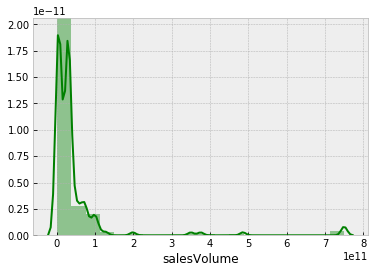

In [30]:
sns.distplot(odf['salesVolume'], color='g', bins=20, hist_kws={'alpha': 0.4});